### Pymaceuticals

In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. The objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of metastatic sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.


#### Tumor volume change analysis:

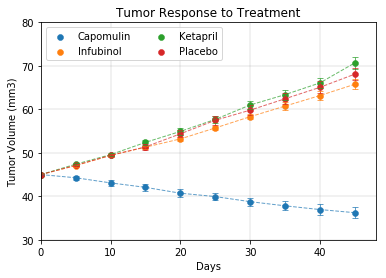

In [193]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Import datasets and create dataframes
mouse_drug = "raw_data\mouse_drug_data.csv"
clinical_trial = "raw_data\clinicaltrial_data.csv"

mouse_drug_df = pd.read_csv(mouse_drug)
clinical_trial_df = pd.read_csv(clinical_trial)

# Test for uniqueness of treatments
mouse_drug_df['Mouse ID'].value_counts()

# Remove double-dosed mouse
mouse_drug_df['Mouse ID'] = mouse_drug_df[mouse_drug_df['Mouse ID'] != 'g989']

# Merge dataframes
combo_df = pd.merge(mouse_drug_df,clinical_trial_df,on='Mouse ID')

drug_names =['Capomulin','Infubinol', 'Ketapril', 'Placebo']

# Group for treatment analysis and calculate means and standard errors
treatments_group = combo_df.groupby(["Drug","Timepoint"])
treatments_mean_df = treatments_group.mean().reset_index()
treatments_sem_df = treatments_group.sem().reset_index()



# Create pivot for drug comparison
tumor_mean_pivot_df = treatments_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').reset_index()
tumor_sem_pivot_df = treatments_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').reset_index()

# Build traces for each drug and add to plot
for drug in drug_names:
    x = tumor_mean_pivot_df.iloc[0:10,0]
    data =  tumor_mean_pivot_df.loc[0:10,drug]
    data_error = tumor_sem_pivot_df.loc[0:10,drug]
    plt.scatter(x, data,marker = 'o',linestyle = 'None',linewidth = .5)
    plt.errorbar(x,data,data_error, capsize = 3,label='',linestyle = 'dashed',alpha=0.7,linewidth=1.)
    plt.xlim( 0, 48 )
    plt.ylim(30,80)
    plt.grid(color='gray', linewidth=.22)
    plt.title('Tumor Response to Treatment')
    plt.xlabel('Days')
    plt.ylabel('Tumor Volume (mm3)')
    plt.legend(loc = 2, ncol = 2)

plt.show()


#### Metastatic site change analysis:

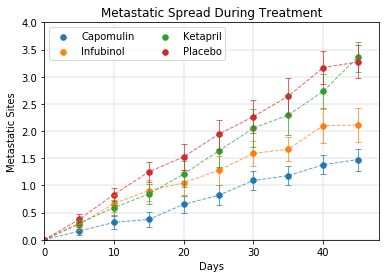

In [194]:
# Pivot for metastatic mean and standard error analysis
metastatic_mean_pivot_df = treatments_mean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').reset_index()
metastatic_sem_pivot_df = treatments_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').reset_index()
for drug in drug_names:
    x = metastatic_mean_pivot_df.iloc[0:10,0]
    data = metastatic_mean_pivot_df.loc[0:10,drug]
    data_error = metastatic_sem_pivot_df.loc[0:10,drug]
    plt.scatter(x, data,marker = 'o',linestyle = 'None',linewidth = .5)
    plt.errorbar(x,data,data_error, capsize = 3,label='',linestyle = 'dashed',alpha=0.7,linewidth=1.)
    plt.xlim( 0, 48 )
    plt.ylim(0,4)
    plt.grid(color='gray', linewidth=.22)
    plt.title('Metastatic Spread During Treatment')
    plt.xlabel('Days')
    plt.ylabel('Metastatic Sites')
    plt.legend(loc = 2, ncol = 2)

plt.show()

#### Survival rate analysis:

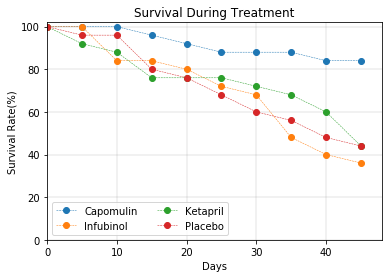

In [195]:
# Group and pivot for mouse counts(i.e Survival Rate)
mouse_count_pivot_df= treatments_group['Mouse ID'].count().reset_index().pivot(index='Timepoint', columns='Drug', values='Mouse ID').reset_index()

for drug in drug_names:
    x = mouse_count_pivot_df.iloc[0:10,0]
    data = (mouse_count_pivot_df.loc[0:10,drug])*4
    plt.plot(x, data,marker = 'o',linestyle = 'dashed',linewidth = .5)       
    plt.xlim( 0, 48 )
    plt.ylim(0,102)
    plt.grid(color='gray', linewidth=.22)
    plt.title('Survival During Treatment')
    plt.legend(loc = 3, ncol = 2)
    plt.xlabel('Days')
    plt.ylabel('Survival Rate(%)')
    
plt.show()


#### Total volume change summary:

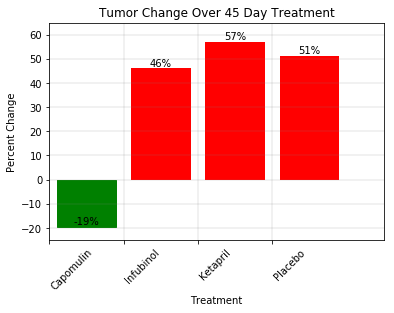

In [207]:
# Grab endpoint data
volume_change_begin = combo_df.loc[combo_df['Timepoint']==0 ,:]
volume_change_end = combo_df.loc[combo_df['Timepoint']==45 ,:]

# Merge datasets, groupby Drug and calculate delta
volume_change_delta_df = pd.merge(volume_change_begin,volume_change_end, on = 'Mouse ID')
volume_change_sum_df = volume_change_delta_df.groupby('Drug_x').sum().reset_index()
volume_change_sum_df['Percent Change'] = (volume_change_sum_df['Tumor Volume (mm3)_y']-volume_change_sum_df['Tumor Volume (mm3)_x'])/volume_change_sum_df['Tumor Volume (mm3)_x']*100

# Reduce to the dataset to the drugs of interest 
sub_volume_change_sum_df=volume_change_sum_df[volume_change_sum_df['Drug_x'].isin(drug_names)].reset_index()
   
#_Build Bar chart
x_axis = np.arange(len(drug_names))
for drug in drug_names:                   
    bar_list = plt.bar(x_axis,sub_volume_change_sum_df['Percent Change'],color = 'red')    
tick_locations = [value -.5 for value in x_axis]
plt.xlim(-0.25, len(x_axis))
plt.ylim(-25,65)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Treatment")
plt.ylabel("Percent Change")
plt.xticks(tick_locations,sub_volume_change_sum_df['Drug_x'],rotation=45,horizontalalignment = 'left')

# Add values to bars
i = 0
while i < len(x_axis):
    plt.text(x_axis[i],sub_volume_change_sum_df['Percent Change'][i],str(int(sub_volume_change_sum_df['Percent Change'][i]))+"%",ha='center', va='bottom')
    i +=1

plt.grid(color='gray', linewidth=.22)
bar_list[0].set_color('green')
plt.show()


Three main conclusions from analysis:

1.  Capomulin was the only drug in the test group that lowered tumor cell volumes and was 
2.  Capomulin was also the best drug for metastatic site spread control.
3.  Sample means appear to be adequate for comparisons based on low standard errors measured across the test runs. A Students t-test might better answer whether the differences seen above were significant.
